In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

# 1 Load Data

In [2]:
df=pd.read_csv('/Users/halisyigin/Desktop/showwcase/showwcase_sessions.csv')
df.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              300 non-null    float64
 1   customer_id             300 non-null    float64
 2   login_date              300 non-null    object 
 3   projects_added          300 non-null    object 
 4   likes_given             300 non-null    object 
 5   comment_given           300 non-null    object 
 6   inactive_status         300 non-null    object 
 7   bug_occured             300 non-null    object 
 8   session_projects_added  300 non-null    float64
 9   session_likes_given     299 non-null    float64
 10  session_comments_given  300 non-null    float64
 11  inactive_duration       300 non-null    float64
 12  bugs_in_session         300 non-null    float64
 13  session_duration        300 non-null    float64
dtypes: float64(8), object(6)
memory usage: 33.

# 2 Data Cleaning

In [4]:
# Check nan values in dataset
df.isna().sum()

session_id                2
customer_id               2
login_date                2
projects_added            2
likes_given               2
comment_given             2
inactive_status           2
bug_occured               2
session_projects_added    2
session_likes_given       3
session_comments_given    2
inactive_duration         2
bugs_in_session           2
session_duration          2
dtype: int64

In [5]:
#Let's see which rows has nan values
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
35,862128.0,23404.0,10/26/19,True,False,True,True,False,2.0,NaN,2.0,1120.0,0.0,95.0
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# There is no data in row 300 and 301. So we can drop them.
df=df.drop([df.index[300],df.index[301]])

In [7]:
# Row 35 has a nan value. I prefer the fill this value with mean of the column. 
# Since 300 data is not much, I don't want to drop this row
df.fillna(df.mean(), inplace=True)

In [8]:
# When I check the data types login_data is object. I want to convert it datetime type.
df['login_date']= pd.to_datetime(df['login_date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   session_id              300 non-null    float64       
 1   customer_id             300 non-null    float64       
 2   login_date              300 non-null    datetime64[ns]
 3   projects_added          300 non-null    bool          
 4   likes_given             300 non-null    bool          
 5   comment_given           300 non-null    bool          
 6   inactive_status         300 non-null    bool          
 7   bug_occured             300 non-null    bool          
 8   session_projects_added  300 non-null    float64       
 9   session_likes_given     300 non-null    float64       
 10  session_comments_given  300 non-null    float64       
 11  inactive_duration       300 non-null    float64       
 12  bugs_in_session         300 non-null    float64   

In [10]:
df.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,2019-10-30,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,2019-10-30,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,2019-10-30,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,2019-10-30,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,2019-10-30,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0


# 3 EDA

## 3.1 Customer

In [11]:
#Lets check each customers login times
customer_count=df.customer_id.value_counts()
customer_count.head(10)

29375.0    22
23404.0    21
38459.0    18
40235.0    17
87323.0    17
40572.0    16
73245.0    15
14354.0    15
87265.0    12
51243.0    12
Name: customer_id, dtype: int64

In [12]:
df.customer_id.nunique()

48

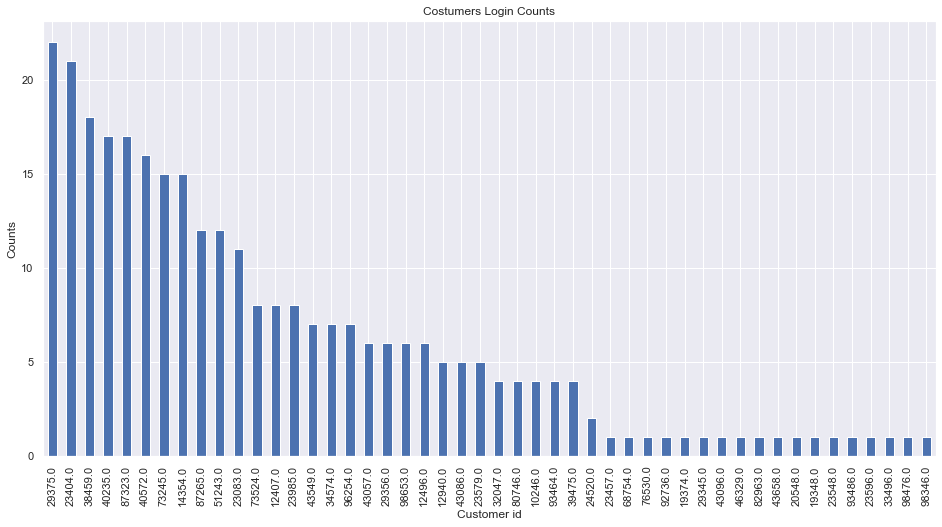

In [13]:
# Distribution of Costomer login counts
sns.set(rc={'figure.figsize':(16,8)})
customers=customer_count.plot(kind='bar')
customers.set_ylabel('Counts')
customers.set_xlabel('Customer id')
customers.set_title('Costumers Login Counts')
customers.set_xticklabels(customers.get_xticklabels(), rotation=90)
plt.show()

In [14]:
# Avarage costumer login times
np.mean(customer_count)

6.25

## 3.2 Boolean Columns Distribution

In [15]:
projects_added=df['projects_added'].value_counts()
projects_added

True     227
False     73
Name: projects_added, dtype: int64

In [16]:
likes_given=df['likes_given'].value_counts()
likes_given

True     213
False     87
Name: likes_given, dtype: int64

In [17]:
comment_given=df['comment_given'].value_counts()
comment_given

True     225
False     75
Name: comment_given, dtype: int64

In [18]:
inactive_status=df['inactive_status'].value_counts()
inactive_status

True     172
False    128
Name: inactive_status, dtype: int64

In [19]:
bug_occured=df['bug_occured'].value_counts()
bug_occured

False    184
True     116
Name: bug_occured, dtype: int64

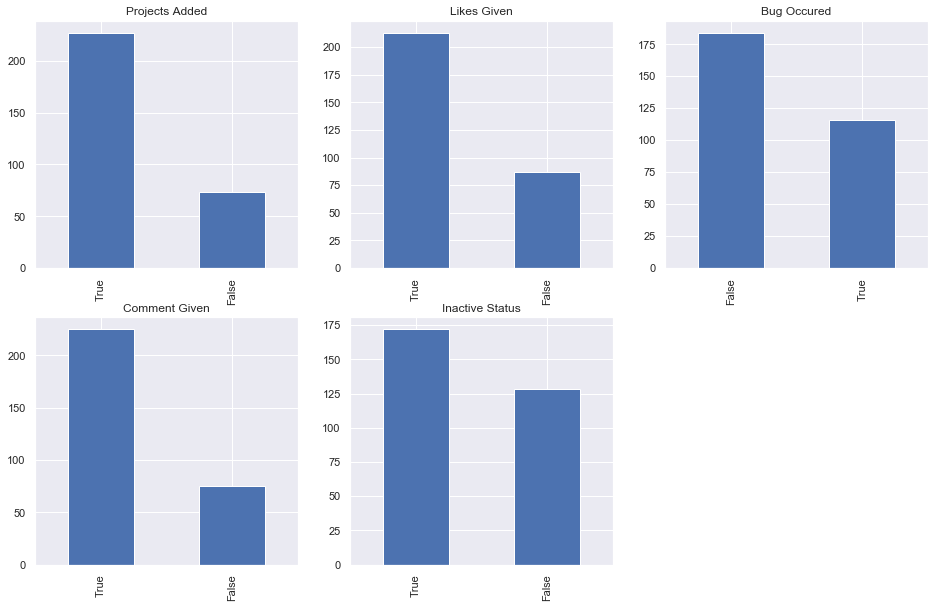

In [20]:
# Set up a grid of plots
fig = plt.figure(figsize=(16,10)) 
fig_dims = (2, 3)
# Plot boolen columns
plt.subplot2grid(fig_dims, (0, 0))
projects_added.plot(kind='bar', 
                                title='Projects Added')
plt.subplot2grid(fig_dims, (0, 1))
likes_given.plot(kind='bar', 
                                title='Likes Given')
plt.subplot2grid(fig_dims, (1, 0))
comment_given.plot(kind='bar', 
                                title='Comment Given')
plt.subplot2grid(fig_dims, (1, 1))
inactive_status.plot(kind='bar', 
                                title='Inactive Status')
plt.subplot2grid(fig_dims, (0, 2))
bug_occured.plot(kind='bar', 
                                title='Bug Occured')

## 3.3 Activity Distribution According to Days of Week

In [21]:
date=df.set_index('login_date')

In [22]:
def date_distribution(data, y_column,title,xlable,ylable):    
    bussines = data.resample('B').sum()
    fridays = data.resample('W-FRI').sum()
    saturdays = data.resample('W-SAT').sum()
    sundays = data.resample('W-SUN').sum()
    plt.xlabel(xlable,fontsize=16)
    plt.ylabel(ylable,fontsize=16)
    plt.title(title, fontsize=22,fontweight='bold')
    plt.bar(bussines.index, bussines[y_column],label='Weekdays')
    plt.bar(saturdays.index, saturdays[y_column],label='Saturday')
    plt.bar(sundays.index, sundays[y_column],label='Sunday')
    plt.xticks(rotation=45)
    plt.legend()

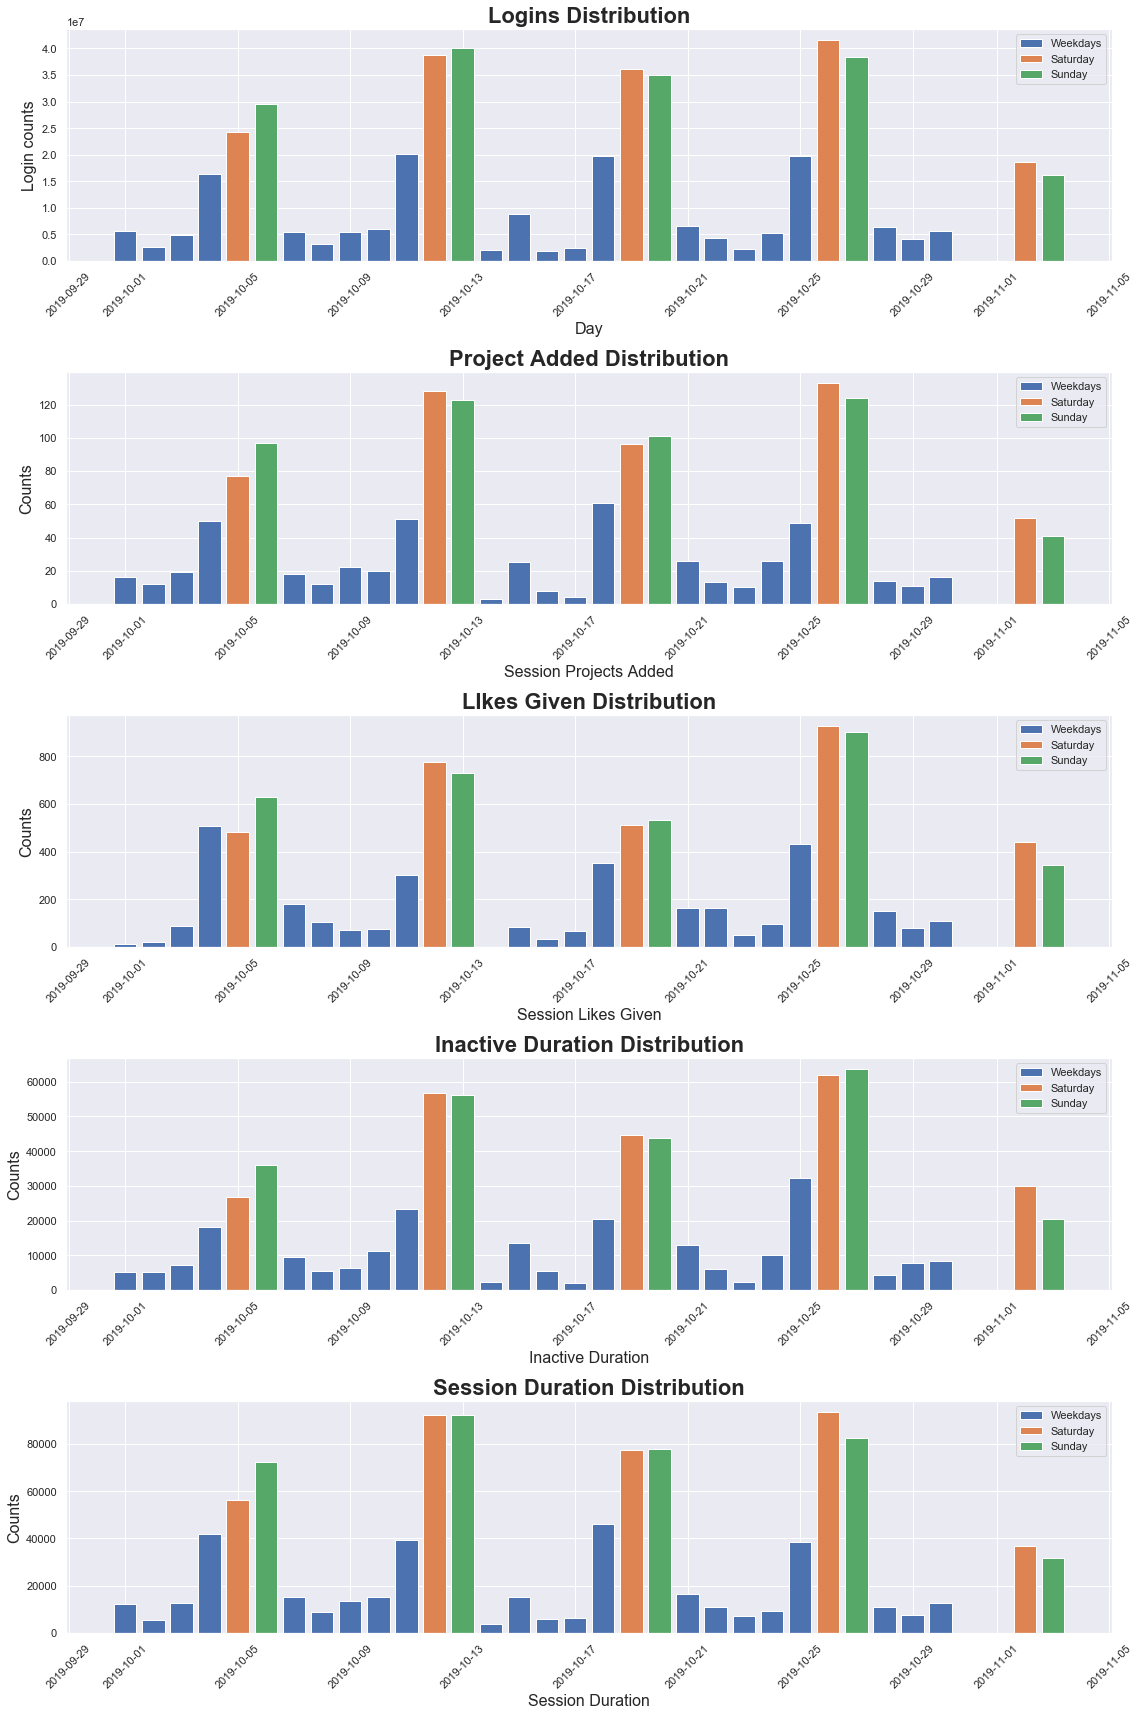

In [23]:
fig = plt.figure(figsize=(16,24)) 
fig_dims = (5, 1)
# Plot boolean columns
plt.subplot2grid(fig_dims, (0, 0))
date_distribution(date,'session_id','Logins Distribution',
                  'Day','Login counts')
plt.subplot2grid(fig_dims, (1, 0))
date_distribution(date , 'session_projects_added','Project Added Distribution',
                  'Session Projects Added','Counts')
plt.subplot2grid(fig_dims, (2, 0))
date_distribution(date , 'session_likes_given','LIkes Given Distribution',
                  'Session Likes Given','Counts')
plt.subplot2grid(fig_dims, (3, 0))
date_distribution(date , 'inactive_duration','Inactive Duration Distribution',
                  'Inactive Duration','Counts')
plt.subplot2grid(fig_dims, (4, 0))
date_distribution(date , 'session_duration','Session Duration Distribution',
                  'Session Duration','Counts')
plt.tight_layout()

## 3.4 Session Duration

In [24]:
df["session_duration"].sort_values(ascending=False).head(10)

204    2395.0
162    2386.0
24     2381.0
60     2381.0
125    2352.0
155    2336.0
170    2333.0
44     2319.0
262    2315.0
244    2313.0
Name: session_duration, dtype: float64

In [25]:
df['time'] = pd.to_datetime(df["session_duration"], unit='s').dt.time
df['time'].sort_values(ascending=False).head(10)

204    00:39:55
162    00:39:46
24     00:39:41
60     00:39:41
125    00:39:12
155    00:38:56
170    00:38:53
44     00:38:39
262    00:38:35
244    00:38:33
Name: time, dtype: object

In [26]:
df['time'].sort_values(ascending=False).tail(10)

263    00:01:01
133    00:00:58
112    00:00:55
90     00:00:53
148    00:00:41
13     00:00:39
29     00:00:32
253    00:00:27
274    00:00:11
62     00:00:10
Name: time, dtype: object

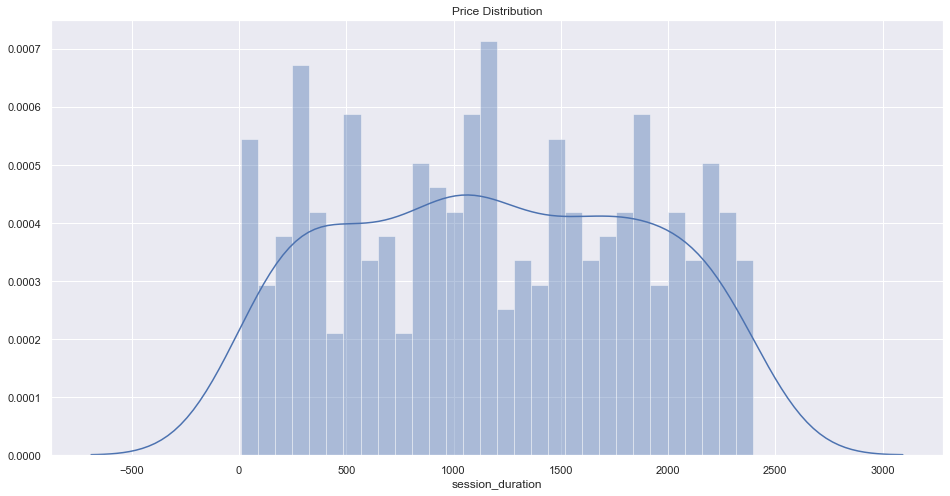

In [27]:
sns.distplot(df["session_duration"],bins=30)
plt.title('Price Distribution')
plt.show()

In [28]:
mean_ci_sd=df['session_duration'].sum()/df['customer_id'].count()
print('Avarage Customer Session Duration (Seconds) = '+ str(mean_ci_sd))
print('Avarage Customer Session Duration (Minutes) = '+ str(mean_ci_sd/60))

Avarage Customer Session Duration (Seconds) = 1186.7633333333333
Avarage Customer Session Duration (Minutes) = 19.77938888888889


## 3.5 Inactive Duration

In [29]:
# I will look at only inactive durations so I don't need 0 duration.
df_nan_0=df[df["inactive_duration"]!=0]

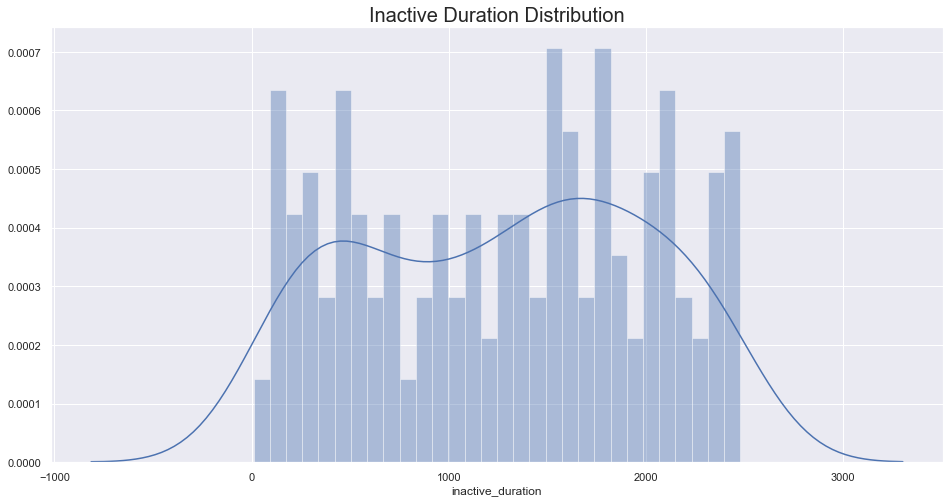

In [30]:
sns.distplot(df_nan_0["inactive_duration"],bins=30)
plt.title('Inactive Duration Distribution',fontsize=20)
plt.show()

## Session Projects Added

In [31]:
df["session_projects_added"].value_counts()

1.0    75
0.0    73
2.0    71
3.0    68
4.0     6
5.0     4
6.0     2
9.0     1
Name: session_projects_added, dtype: int64

## Session Comments Given

In [32]:
df["session_comments_given"].value_counts()

0.0     75
1.0     51
5.0     50
4.0     46
3.0     44
2.0     31
9.0      1
13.0     1
21.0     1
Name: session_comments_given, dtype: int64

## 3.6 Session Likes Given

In [33]:
# I will look at only inactive durations so I don't need 0 duration.
df_nan_0_likes=df[df["session_likes_given"]!=0]

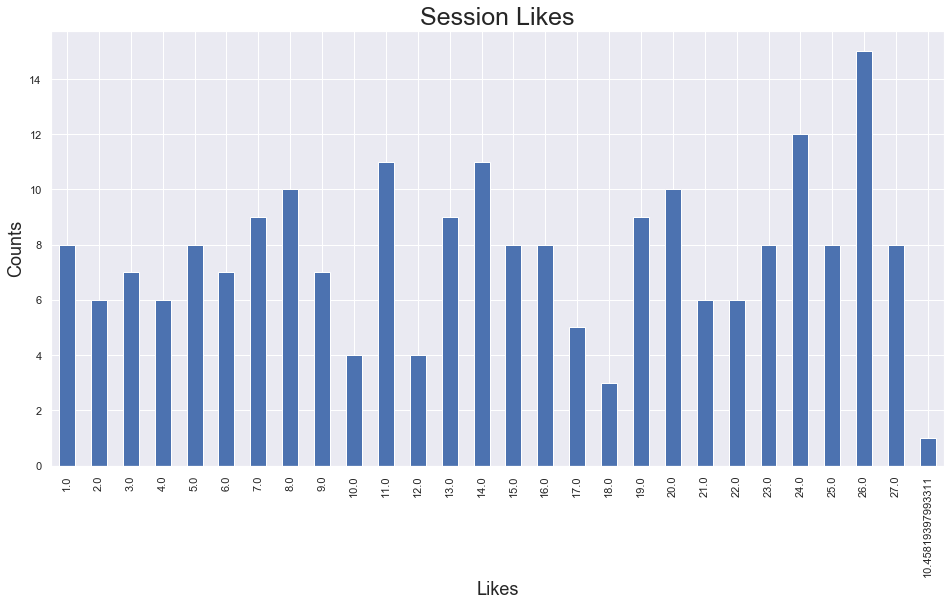

In [34]:
df_nan_0_likes['session_likes_given'].sort_values().value_counts(sort=False).plot(kind='bar')
plt.title('Session Likes',fontsize=25)
plt.xlabel('Likes',fontsize=18)
plt.ylabel('Counts',fontsize=18)
plt.show()

## Correlation Matrix

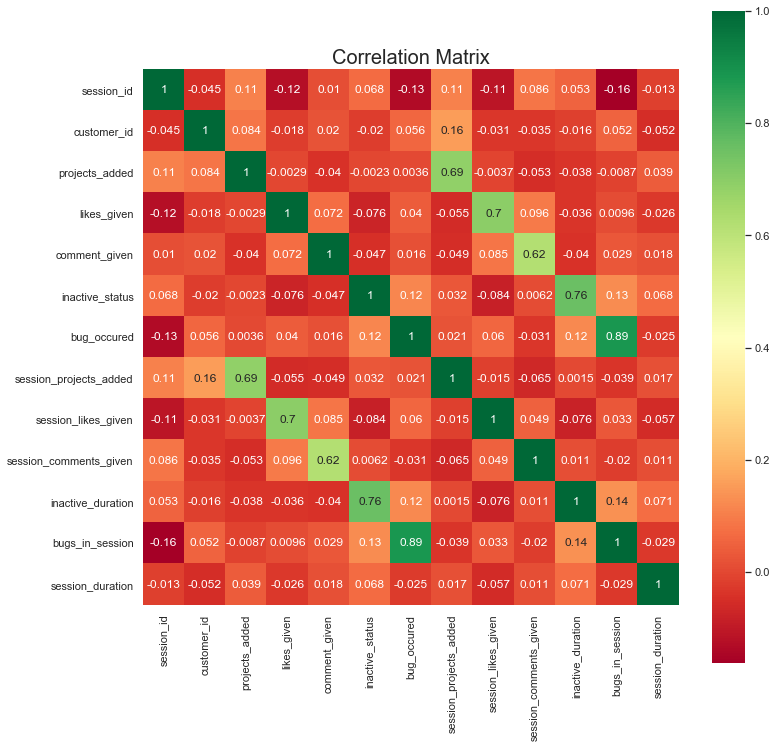

In [35]:
plt.figure(figsize=(12,12)) 
sns.heatmap(df.corr(), square=True, cmap='RdYlGn',annot = True)
plt.title("Correlation Matrix",fontsize=20)
plt.show()